### Kafka Intro
Apache Kafka is an open-source distributed event streaming platform used for building real-time data pipelines and streaming applications. It is designed to handle high-throughput, fault-tolerant and scalable data streams in real-time.

**Kafka Key Features**
- `Publish-Subscribe Messaging System`: 
    - Kafka operates as a distributed **publish-subscribe messaging system**, where **producers** publish messages to **topics** and **consumers** subscribe to topics to receive messages. This decouples data producers from consumers and allows for asynchronous real-time data processing.

- `Distributed Architecture`: 
    - Kafka is **designed as a distributed system** that runs on a cluster of servers called **brokers.** Data is partitioned and replicated across multiple brokers to ensure fault tolerance, high availability and scalability.

- `Partitioning and Replication`:
    - Kafka **partitions data within topics and distributes partitions across brokers in the cluster.** Each partition is replicated across multiple brokers for fault tolerance and durability. Partitioning allows Kafka to scale horizontally and handle large volumes of data.

- `Scalability and High Throughput`:
    - Kafka is built for high-throughput, low-latency data streaming. It **can handle millions of messages per second and supports linear scalability by adding more brokers to the cluster.**

- `Durability and Fault Tolerance`:
    - Kafka provides built-in durability and fault tolerance by replicating data across multiple brokers. In the event of broker failures or network partitions, Kafka ensures that data is not lost and that consumers can continue to read from available replicas.

- `Retention and Compaction`:
    - Kafka supports configurable retention policies for topics, allowing messages to be retained for a specified period or size. Kafka also supports log compaction, which ensures that only the latest version of each message key is retained in the log.

- `Stream Processing and Integration`:
    - Kafka integrates with stream processing frameworks like Apache Flink, Apache Spark, and Apache Samza, allowing developers to build real-time stream processing applications and analytics pipelines. Kafka Connect provides connectors for integrating Kafka with various data sources and sinks, such as databases, message queues, and file systems.

Overall, Kafka is widely used in data-intensive applications:
- real-time analytics
- monitoring
- log aggregation
- ...

Due to its scalability, durability, and real-time processing capabilities. It has become a fundamental component of modern data architectures, enabling organizations to build robust, scalable, and responsive data pipelines.

Real-time data processing doesn't mean that the data is processed at the speed of light. In real-time the data is processed with several milliseconds of delay that is much better than several minutes (batch processing). 

### Kafka Main Elements
The main elements of Kafka include:

- `Producer`: 
    - Producers are responsible for publishing data (messages) to Kafka topics. They send messages to Kafka brokers which then distribute the messages to consumers.

- `Broker`: 
    - Brokers are individual Kafka servers or nodes that form a Kafka cluster. Brokers store and manage data partitions, handle client requests and replicate data across the cluster for fault tolerance.

- `Topic`:
    - Topics are logical categories or channels to which messages are published by producers and from which messages are consumed by consumers. Each topic consists of one or more partitions and messages within a topic are ordered and immutable.

- `Partition`:
    - Partitions are the underlying storage units for topics in Kafka. Each topic can be divided into multiple partitions, and each partition is an ordered, immutable sequence of messages. Partitions allow Kafka to scale horizontally and distribute data across multiple brokers.

- `Consumer Group`:
    - Consumer groups are groups of consumers that jointly consume messages from Kafka topics. Each consumer group consists of one or more consumers and each consumer within a group reads from a subset of partitions within the topic. Consumer groups enable parallel processing of messages and load balancing across consumers.

- `Consumer`: 
    - Consumers are applications or processes that subscribe to Kafka topics and consume messages from them. Consumers can belong to one or more consumer groups and they read messages from partitions in a topic in parallel. Consumers can be implemented as standalone applications, microservices or stream processing frameworks.

- `Offset`: 
    - Offsets are unique identifiers assigned to each message within a partition. They represent the position of a message within the partition's log. Consumers track their current offset in each partition they consume, allowing them to resume reading from where they left off in case of failures or restarts.

**Simple Kafka Topic Example**

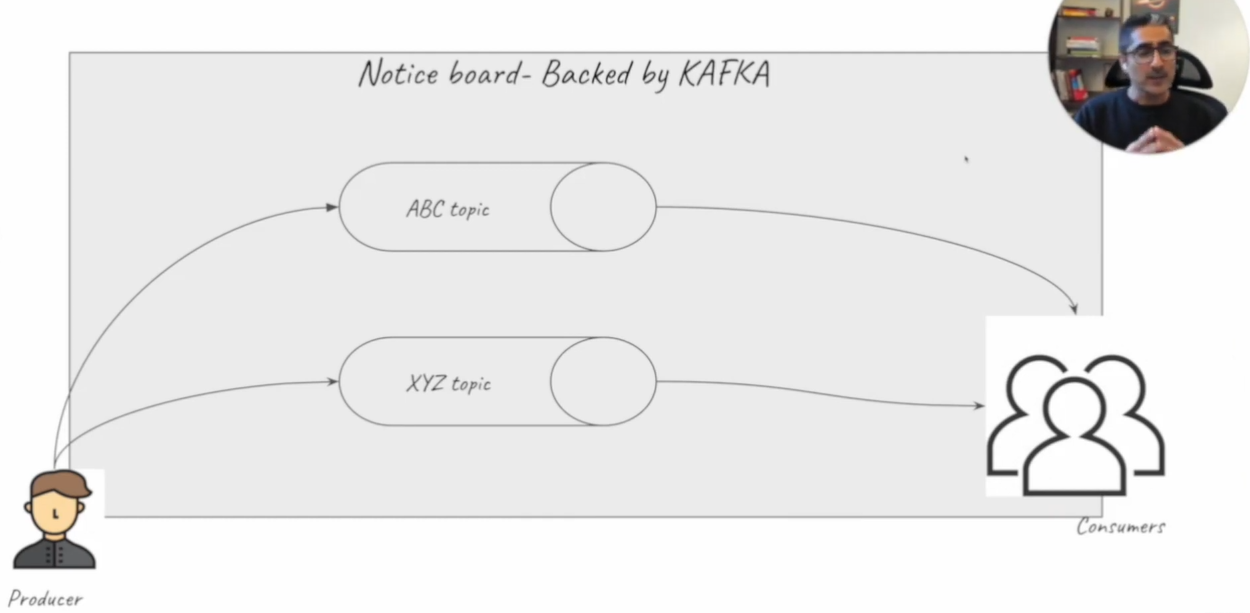

Kafka topic can be considered as a stream of events. For example, an event might be a measurement at certain time (e.g. room temperature) -> single data point. Stored events in a Kafka topic are called logs. Each event is assocciated with a message. Messages usually have different properties (required fields, ...). 


**Kafka Events and Messages**

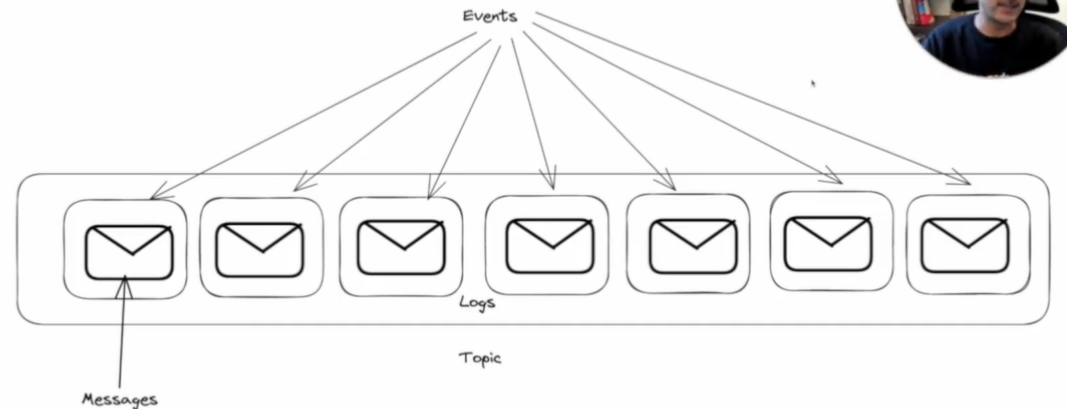

Each message usually has 3 main parameters that is produced by a Kafka Producer:
- `Key`: what is a key of a particular message (needed for partitioning)
- `Value`: value (e.g. temperature, account balance, JSON, ...)
- `Timestamp`: timestamp of a message

**Why Kafka is Special?**
- `Topic Reliability or Robustness`: when the nodes are down the data can be still accessed/available.
- `Data Replication`: Kafka replicates the data across different nodes.
- `Topic Flexibility`: Topics can have any size, from super small to super big. We can define the number of consumers. 
- `Scalability`: ...

### Kafka Cluster
Can be considered a set of nodes/machines that run Kafka and talk to each other (i.e. have network for communication). Earlier Kafka was using ZooKeeper for communication. ZooKeeper was used for Topics (what type of topics exist, what partitions we have, retention for the topic, ...). Now, ZooKeeper is not in Kafka and Kafka uses Kafka Internals -> Topic stores all that relevant information.

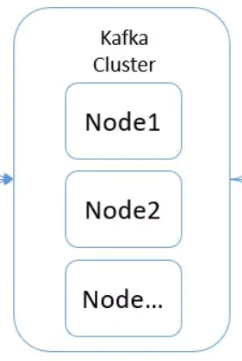

### How Does Kafka Provide Reliability?
The main issue that might happen is that Kafka Topic might be stored on a single node, where Kafka Producers produce messages and from which Kafka Consumers consume those messages. If a node fails, Kafka producers cannot produce in that node -> Kafka Consumers cannot consume that messages.


**Kafka Replication**

- To prevent this issue, replication algorithm comes in. Replication allows replciate or distribute Kafka Topic across nodes. Once the Kafka Topic has been replicated, nodes become **leader and followers**. Now when Kafka Producers produce messages they are first written into leader node and then are replicated into followers. Kafka Consumers still read only from a single node (leader node) and read from followers only if leader is not available. Once leader node is not available, Kafka Producers switch writing into followers.

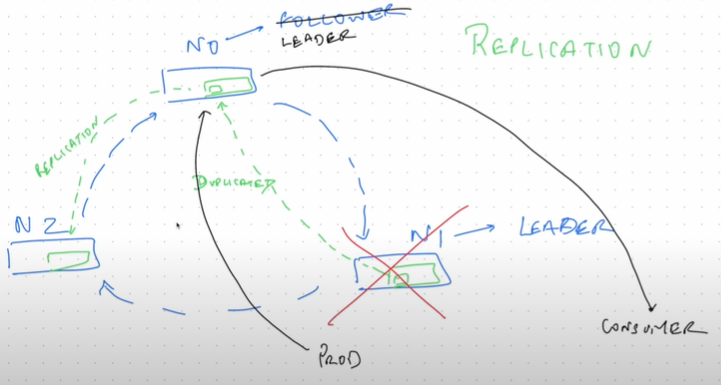


**Kafka Retention**

- Retention policy is crucial in data processing. In practice our resources are limited (e.g. number of nodes, RAM, storage, etc.) and we cannot store all the data or much data, some part of the data must be deleted after some time. For example, if our data stream produces 1b events per minute, it is a lot of data and we cannot store all that data forever. 

- Once the retention policy is defined, Kafka cleans topics from messages that are older than predefined retention -> corresponding messages are deleted from topics.


**Kafka Partitions**

- Partitions allow Kafka to scale. In Kafka partition is applied on Kafka Topics. We can define how many partitions of a topic we would like to have. Once it's done, Kafka topic is partitioned and replicated across nodes. Besides, now **several nodes can talk with the consumers.**

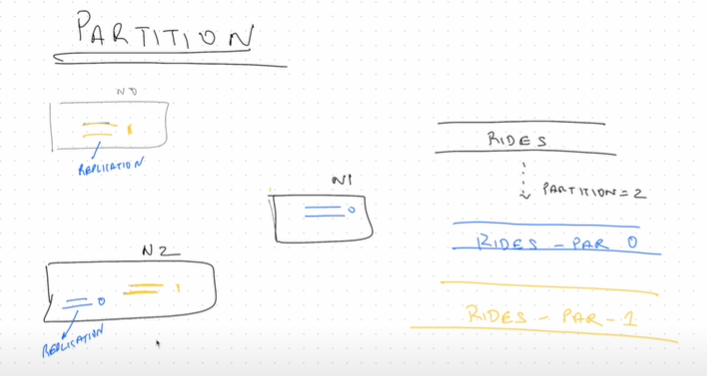


- Have a look at another issue that highlights the importance of having topic partitions. Let's assume that our data stream increased (have more events per second than before, 5x times more) and our consumer cannot read/process that data effectively. Obvious solution -> introduce more consumers that can split the load (e.g. split the load between 2/5/10 consumers).

- To be able to consume partitioned topic using several consumers, we must define **consumer group**. Consumer group usually consist of consumers that consume from the same partitioned topic. Number of those consumers equal to the number of partitions. These consumers have the same *consumer group id* and consume only one topic partition -> several consumers cannot consume from the same topic partition. 

- We can have more consumers than number of partitions. In this case, consumers that are not used will become "spare consumers" and will be used only if some consumers will die. 

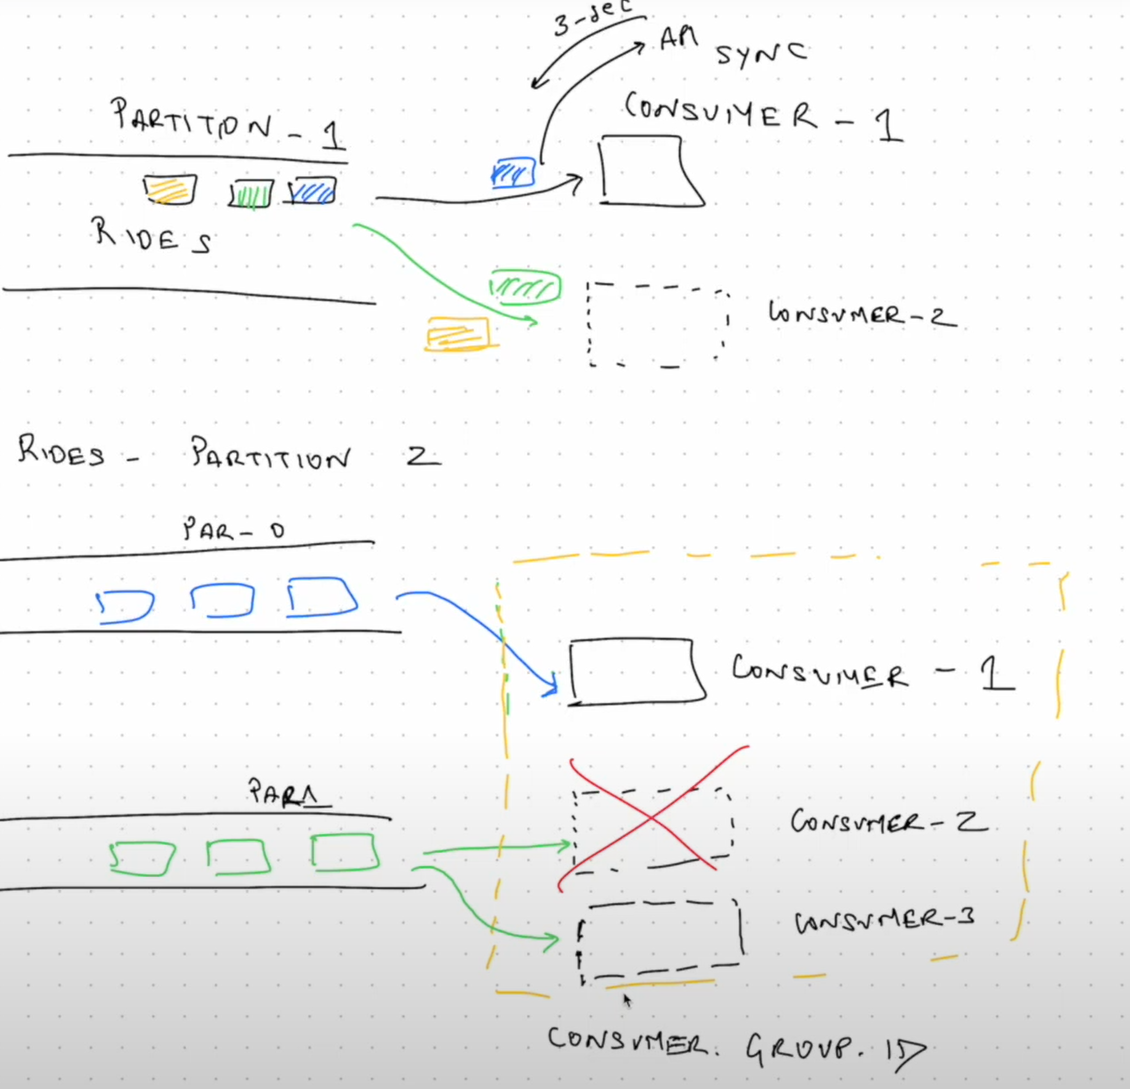


**Kafka Offset**

- How does consumer know which message to consume? How does Kafka know that certain consumer already consumed a certain message? Each message has a value called offset (unique identifiers assigned to each message within a partition). Once a consumer has consumed a message, it tells Kafka about it.  

- Kafka keep tracks of consumed messages from consumers and stores that information into a special topic called `__consumer_offset` (internal Kafka topic). When a consumer reconnects to Kafka (e.g. after failure). Kafka will then check how many messages has been already consumed by a certain *consumer group id* and will tell that consumer from what message to start.

- The information inside `__consumer_offset` usually looks like this:
    - `<consumer_group_id, topic, partition, offset>`

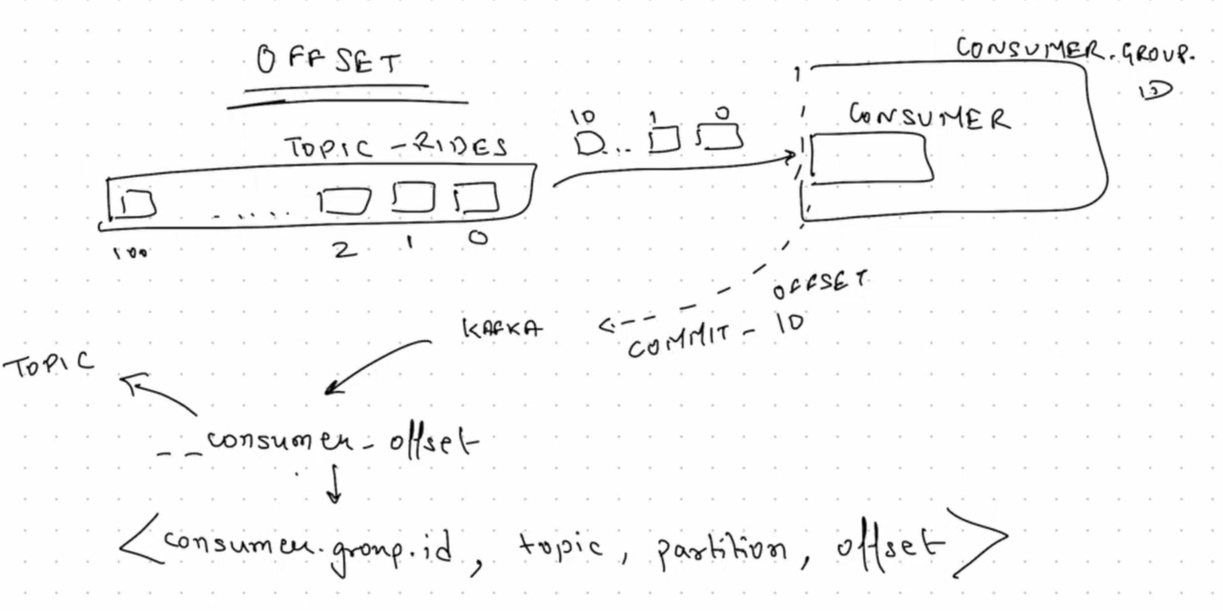


**Kafka Auto Offset Reset**

-It is a way to tell Kafka how to react when a new `consumer group id` has been attached to it. For example, we have 100 messages in a Kafka topic. New `consumer group id` is being introduced. In this case, Kafka doesn't know what message to assign because it hasn't seen it before. 

- Kafka can use two options to define from what message to start:
    - `latest` (default): start consuming after the last message (start from 101)
    - `earliest`: start consuming from the initial message (start from 1/0)

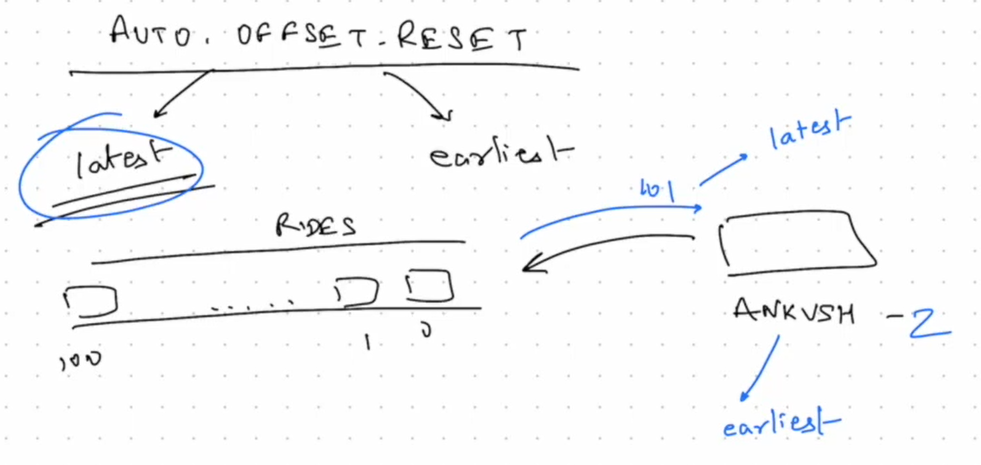


**Kafka Acknowledge All**

- This method comes in when Kafka replicates topics across nodes. 
    - `ack: 0` -> fire and forget -> producer doesn't care if the massage has been delivered or not
        - the fastest method of writing messages
    - `ack: 1` -> leader success -> the message has to be written to the leader node -> release success message
        - optimal methods of writting messages
    - `ack: all` -> leader + followers -> the message has to be written to the leader node and followers -> release success message
        - the slowest method of writing messages

**Example**
- Use case: VM logs analysis: if some information is missing, it's fine since it's not so important -> use `ack: 0`
- Use case: Tax logs: we care about data, we don't want to lose tax data -> use `ack: all`

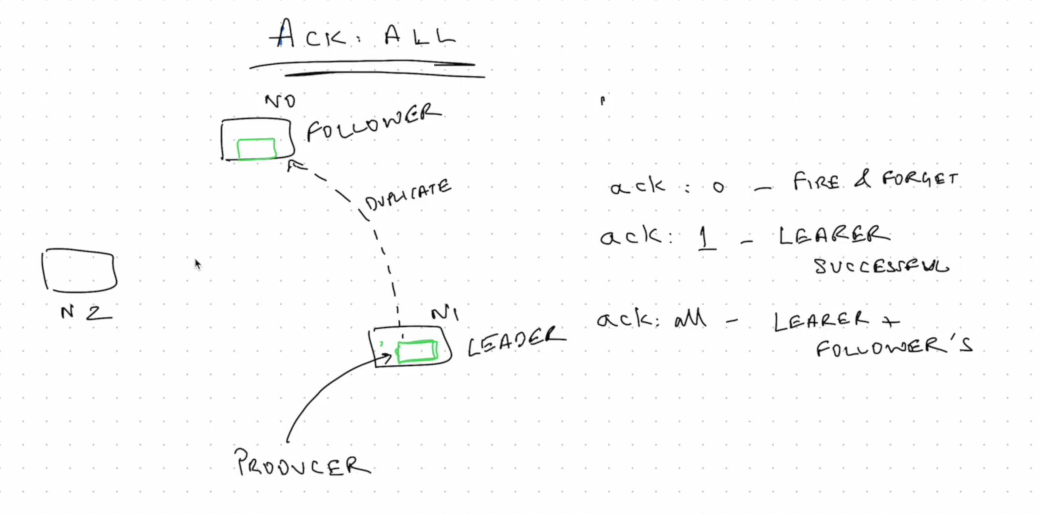

### Kafka Streams Basics
let's assume that we have our data and would like to get an aggregated result. In this case, we `group by KEY` and then apply an aggregation function to get the final result. Assume that we have only 1 application thtrough which our partitions are coming through. Since it's 1 app, **all partitions are distributed equally across the app -> we get the same correct result. 

However, if we have two applications, the process becomes a bit more difficult sicne partitions might be distributed unevenly!

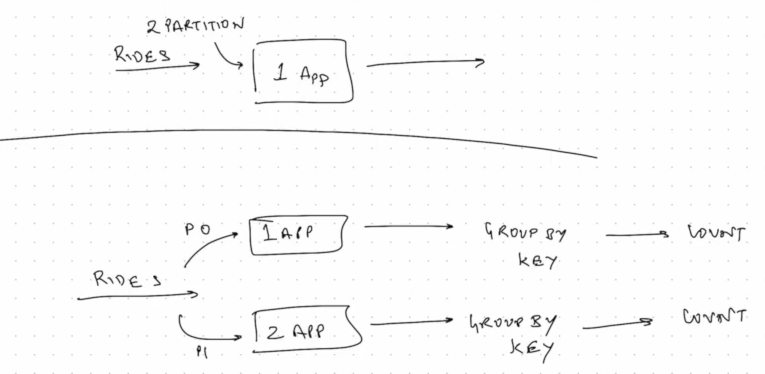

`KEY` is an **important parameter** that is responsible for how we partition our data. `KEY` defines in which partition the data will go to! 

**How does Kafka solve uneven partitions distribution?**

When we produce messages (i.e. when producer writes into Kafka), Kafka hashes the `KEY from a message` and applies modules divition on `PARTITION COUNT` (number of overall topic partitions). This allows disributed messages evenly into partitions.

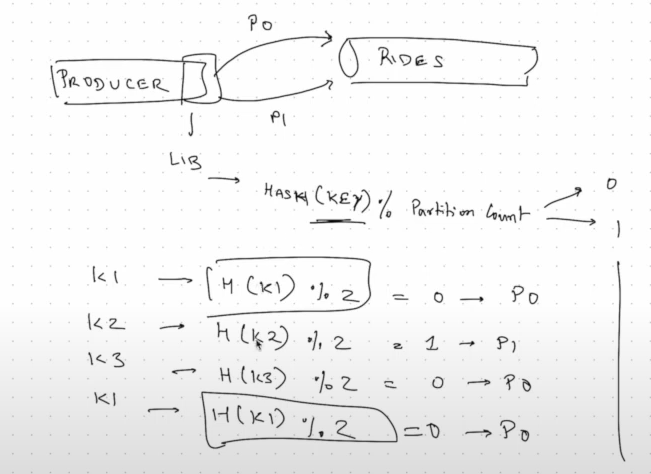

**What if KEY is NULL?**

In this case, Kafka uses `Round-Robin` method in which each messages goes into each partition. It has a big advantage that the data size is always equal across partitions. 

### What is Kafka Streams / KStream?
KStream is a core abstraction in Apache Kafka Streams, which is a powerful library for building stream processing applications. KStream represents an unbounded, continuously updating stream of records, where each record is a key-value pair. This abstraction is used for real-time processing and analytics of data streams, such as log files, sensor data, or transaction records.

Kafka Streams provides a rich set of operations for KStream, including filtering, mapping, joining, and aggregating data. These operations allow developers to transform and process streams in various ways. For example, you can filter out certain records, map each record to a new key-value pair, join two streams, or aggregate records to produce summary results​ (Apache Kafka)​​ (Confluent)​.

One of the key concepts in Kafka Streams is the "stream-table duality," where a stream can be viewed as a series of changes to a table, and vice versa. This means that a stream (KStream) can be used to create a table (KTable), and a table can be treated as a stream of updates​ (Confluent Documentation)

KStream supports both *stateless* and *stateful* operations:
- Stateless operations, like filtering and mapping, do not require maintaining any state beyond the processing of individual records.
- Stateful operations, such as counting, aggregating, and joining, require maintaining state across multiple records and are backed by state stores. These stateful operations enable more complex stream processing tasks​ (Confluent)​​ (Apache Kafka)​.

Kafka Streams also provides various *windowing options* for handling time-based aggregations, allowing you to group and process records within specific time windows. This is particularly useful for applications like time-series analysis and event-driven architectures​ (Confluent)​.

### What is Kafka Stream Builder?
StreamsBuilder is a crucial component used to construct the stream processing topology. It is part of the Kafka Streams and provides a high-level API for defining data transformations and stream processing logic.

**Key Functions of StreamsBuilder**
1. Defining Streams and Tables:
    - *KStream*: The StreamsBuilder can create instances of KStream, which represent continuous streams of records. This is done using methods like stream(), where you specify the Kafka topics from which the streams will be read.
    - *KTable*: Similarly, StreamsBuilder can create KTable instances, which represent tables (or changelogs) derived from Kafka topics. This is useful for stateful transformations where you need to maintain the latest state for each key.

2. Transformations:
    - The StreamsBuilder allows you to define various transformations on streams and tables, such as filtering, mapping, joining, and aggregating. These transformations are expressed using fluent APIs that make the code readable and concise.
    - Example: builder.stream("input-topic").filter(...).map(...).to("output-topic");

3. Building the Topology:
    - Once all the streams and their transformations are defined, the StreamsBuilder builds the processing topology, which is a directed acyclic graph (DAG) representing the flow of data and the transformations applied to it.
    - The build() method is called on StreamsBuilder to construct this topology, which is then passed to a KafkaStreams instance to start the processing.


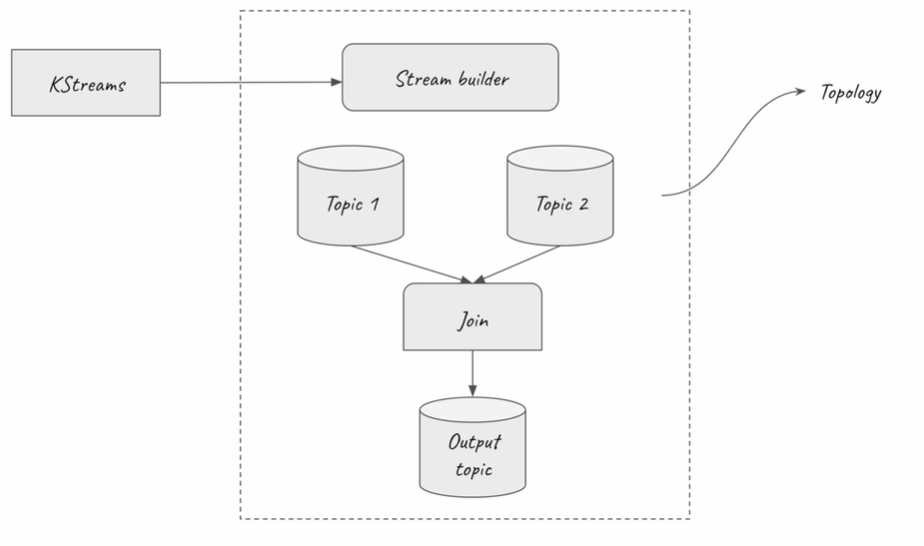

### Kafka Streams Join
Kafka Streams Join is a feature in Kafka Streams, a client library for building real-time stream processing applications on top of Apache Kafka. It enables the combination of data from two or more Kafka topics based on a common key, allowing for sophisticated data enrichment, correlation, and merging operations in a streaming context.

Here are the primary types of joins supported in Kafka Streams:

**1. KStream-KStream Join:**

- *Description*: Joins records from two Kafka topics where each topic is represented as a KStream (a continuously updating stream of records).
- *Use Cases*: Suitable for joining two streams of data, such as combining clickstream data with user activity logs.
- *Windowing*: This join requires a window to define the timeframe within which records from both streams should be joined. Windows can be of fixed size (e.g., 5 minutes) or session-based.
- **Important**: Topics must have the same `PARTITION COUNT`

**2. KStream-KTable Join:**

- *Description*: Joins a KStream with a KTable (a changelog stream where each record represents an update to a keyed table).
- *Use Cases*: Useful for enriching a stream of events with static or slowly changing data (e.g., joining a stream of transactions with user profile information).
- *No Windowing Needed*: Unlike KStream-KStream joins, KStream-KTable joins do not require windowing since the KTable represents the latest state of the data.

**3. KTable-KTable Join:**

- *Description*: Joins two KTables, combining their current states based on a common key.
- *Use Cases*: Often used for combining two sets of slowly changing data or tables, such as joining customer information with order details.
- *No Windowing Needed*: As both inputs are KTables, the join operates on the latest available state of the data.


### How Joins Work

- *Common Key*: Joins in Kafka Streams are performed based on a common key present in both streams/tables.
- *Windowing*: For KStream-KStream joins, the windowing mechanism specifies the period during which the records must have arrived to be considered for the join.
- *State Stores*: Kafka Streams maintains local state stores to keep track of the records required for the join operations.

### Example of a KStream-KStream Join

```
KStream<String, Order> ordersStream = builder.stream("orders");
KStream<String, Shipment> shipmentsStream = builder.stream("shipments");

KStream<String, OrderShipment> orderShipmentStream = ordersStream.join(
    shipmentsStream,
    (order, shipment) -> new OrderShipment(order, shipment),
    JoinWindows.of(Duration.ofMinutes(5)),
    StreamJoined.with(Serdes.String(), orderSerde, shipmentSerde)
);

orderShipmentStream.to("order-shipments");
```

### Kafka Stream Testing
Kafka Stream Testing involves validating the correctness and performance of stream processing applications built using Kafka Streams. Testing these applications ensures that the data processing logic is functioning as expected, handling various edge cases, and performing efficiently. Kafka Streams testing can be done through several approaches, including unit tests, integration tests, and performance tests.

Usually the Tests are being run on so-called *Topologies*

### Kafka Stream Windowing 

**Global KTable**

Usually KTable is partitioned and distributed across different nodes. Each node stores only some part of the data. If we need to `JOIN` this data, we need to apply shuffling or may be create another topic and this is costly in distributed systems, especially shuffling. That's why we have *Global KTable* that tries to prevent this issue.

If we put *Global KTable* on the nodes instead if *KTable*, the full data is available to each node and when we need to join data from two different nodes, we don't need to apply shuffling. 

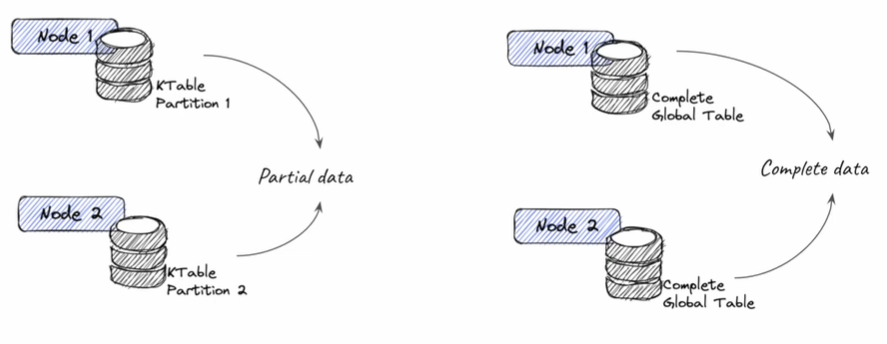

However, there is a restriction on data size. We cannot use *Global KTable* for large data.

**Type of Supporting JOINS**

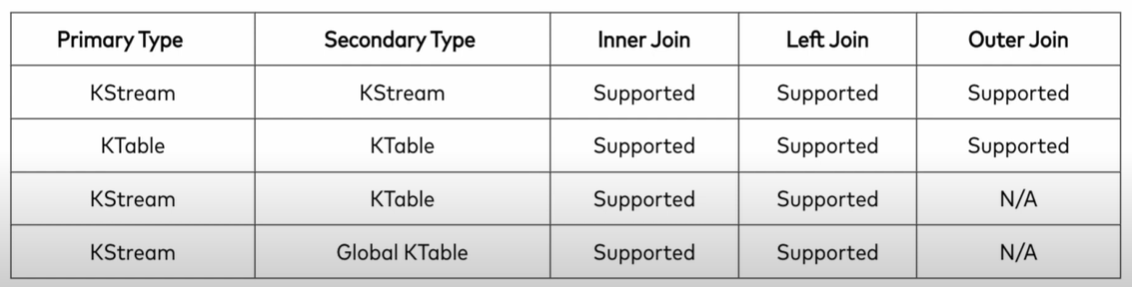

**Join within 10s Window**

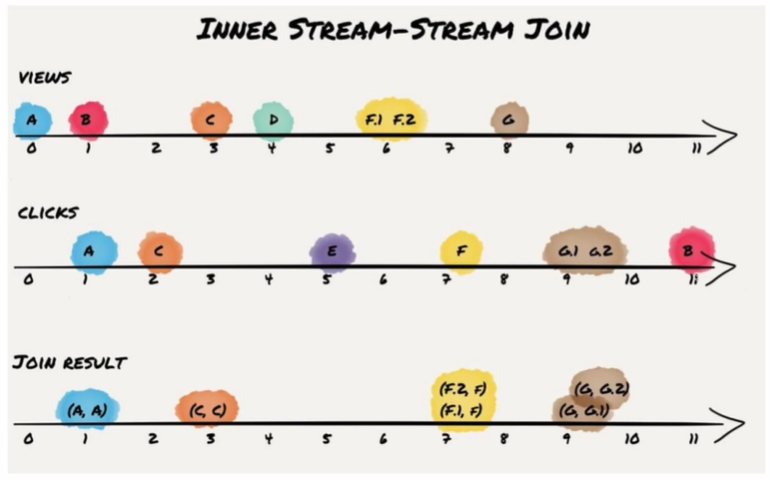

**Kafka Windowing Type**

There are 4 windowing type in Kafka:
- Tumbling: fixed size non overlapping windows
- Hopping: Fixed size and overlapping windows
- Sliding: Fixed-size, overlapping windows that work on differences between record timestamps
- Session: Dynamically-sized, non-overlapping, data-driven windows


**Tumbling Window**

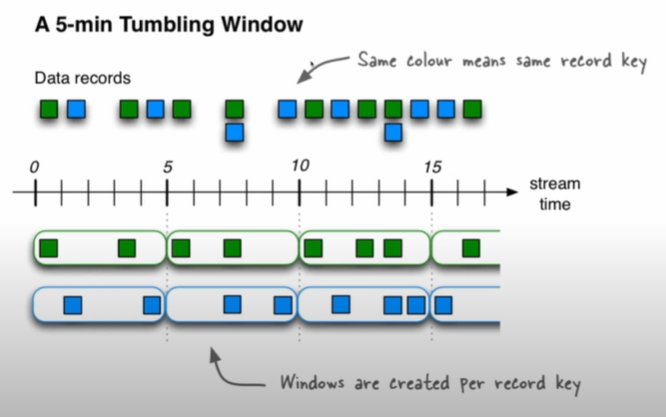

**Hopping Window**

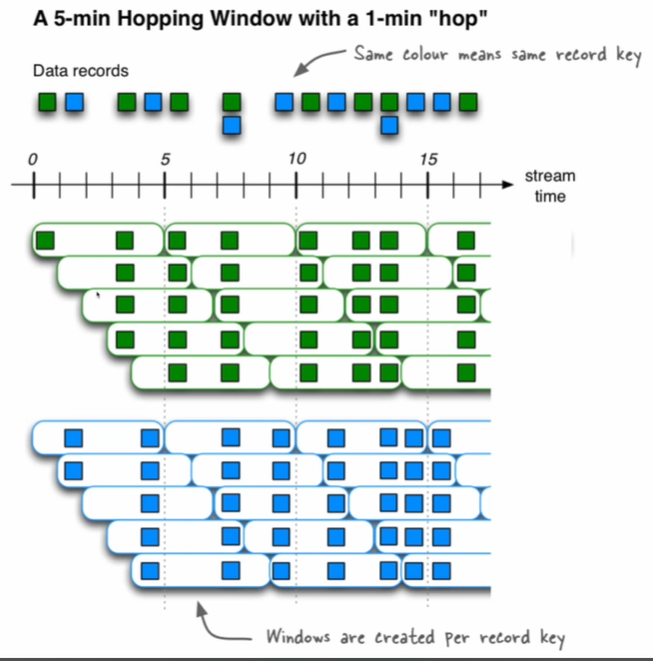

**Session Windowing**

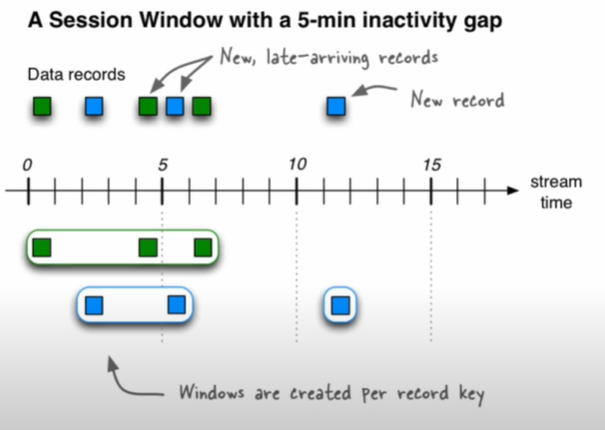

### Kafka ksqlDB
Kafka ksqlDB is a stream processing engine built on top of Apache Kafka. It enables users to create, manage, and execute continuous, real-time queries on streaming data using a SQL-like syntax. 

Here are the key points about ksqlDB:

- Stream Processing with SQL: 
    - ksqlDB allows developers to use SQL queries to transform, enrich, and aggregate streaming data in real-time. This is similar to how traditional databases use SQL for querying static data.

- Built on Kafka: 
    - ksqlDB leverages Kafka's robust messaging and storage capabilities. It directly interacts with Kafka topics, consuming data from them, processing it, and producing new data back into Kafka topics.

- Ease of Use: 
    - By providing a SQL interface, ksqlDB simplifies the process of stream processing. Developers familiar with SQL can write streaming applications without needing to learn complex programming languages or APIs specific to stream processing.

- Real-Time Analytics: 
    - With ksqlDB, you can perform real-time analytics on data streams. This includes tasks like filtering, joining, and aggregating data as it flows through Kafka.

- Event-Driven Applications: 
    - ksqlDB supports the development of event-driven applications that respond to data changes in real time. This is useful for use cases such as monitoring, alerting, and automated responses to events.

- Scalability and Fault Tolerance: 
    - Inherited from Kafka, ksqlDB benefits from Kafka's scalability and fault tolerance. It can handle large volumes of streaming data and ensure high availability.

- Persistent State: 
    - ksqlDB maintains the state of stream processing jobs, enabling features like windowed aggregations and joins across time intervals.


**Key Concepts**
- Streams and Tables: In ksqlDB, a stream represents an unbounded sequence of structured data (events) in time order, while a table represents a collection of evolving facts (like a database table).
- Queries: ksqlDB supports two types of queries: persistent queries (continuous and running until stopped) and pull queries (one-time snapshot queries on the current state of the data).
- Connectors: ksqlDB can integrate with various data sources and sinks, enabling seamless data ingestion and export.

**Use Cases**
- Real-Time Data Integration: Combining and transforming data from multiple sources in real time.
- Monitoring and Alerting: Setting up real-time monitoring dashboards and alerting systems.
- ETL Processes: Performing extract, transform, and load (ETL) operations on streaming data.
- Data Enrichment: Enhancing streams of data with additional information from other streams or tables.


### What is Kafka Connect?
Kafka Connect is a framework included in Apache Kafka that facilitates the integration of Kafka with other systems, such as databases, key-value stores, search indexes, and file systems. It provides a standardized and scalable way to stream data into and out of Kafka, enabling continuous data movement across different systems without needing custom code for each integration.

Here are the key aspects of Kafka Connect:

- Source Connectors: 
    - These connectors allow data to be ingested into Kafka from external systems. For example, a JDBC source connector can stream data from a relational database into Kafka topics.

- Sink Connectors
    - These connectors enable data from Kafka topics to be pushed out to external systems. For instance, an Elasticsearch sink connector can stream data from Kafka topics into an Elasticsearch index.

- Distributed and Standalone Modes
    - Kafka Connect can run in two modes:

- Standalone Mode
    - Suitable for running on a single machine for simple use cases or development purposes.

- Distributed Mode
    - Ideal for production environments, it allows connectors to scale out across a cluster of machines for fault tolerance and load balancing.

- Configuration and Management
    - Connectors are configured using simple JSON files or via REST APIs. Kafka Connect handles the lifecycle of these connectors, including automatic restart and offset management.

- Pluggable
    - Kafka Connect supports a variety of connectors, and new connectors can be developed and plugged in easily. The community and commercial vendors provide numerous ready-to-use connectors for common systems.

- Transformation and Filtering:
    - Kafka Connect includes a transformation API that allows users to modify and filter messages as they flow through connectors. This can be used to change data formats, filter out unwanted data, or enrich messages with additional information.

- Fault Tolerance and Scalability:
    - Kafka Connect inherits Kafka’s strong fault tolerance and scalability features. In distributed mode, connectors can be rebalanced across the cluster to handle changes in load or failures.

**Benefits**
- Ease of Integration: Simplifies the process of connecting Kafka to various data systems.
- Scalability: Supports distributed operation, making it suitable for large-scale data integration tasks.
- Fault Tolerance: Automatically manages task restarts and offsets, ensuring robust data pipelines.
- Flexibility: A wide range of connectors available and the ability to create custom ones if needed.

### Kafka Schema Registry

Kafka Schema Registry is a critical component in managing and evolving the schemas used by Apache Kafka. It provides a centralized repository for storing and retrieving schemas for Kafka messages, ensuring that data producers and consumers agree on the data format. This is essential for maintaining data consistency and compatibility as applications evolve.

Key Features of Kafka Schema Registry:

1. Schema Storage and Versioning: 
    - The Schema Registry stores a versioned history of all schemas, allowing applications to retrieve specific schema versions based on a subject name strategy. This helps manage the evolution of data schemas over time.

2. Compatibility Checks: 
    - It provides multiple compatibility settings (such as backward, forward, and full compatibility) to ensure that new schema versions do not break existing consumers.

3. Serialization and Deserialization:
    - Kafka clients can use serializers and deserializers provided by the Schema Registry to automatically handle schema storage and retrieval when producing and consuming messages.

4. RESTful Interface: 
    - The Schema Registry offers a RESTful API for schema management, making it easy to integrate with other tools and applications.


**How It Works**
- Producer Interaction:
    - When a producer sends a message to Kafka, it registers the schema with the Schema Registry and includes a schema identifier in the message.
- Consumer Interaction:
    - When a consumer reads a message, it retrieves the schema using the identifier from the Schema Registry, ensuring it can correctly deserialize the message.


**Benefits**
- Data Integrity: Ensures that producers and consumers are synchronized on the message format, preventing data corruption.
- Schema Evolution: Facilitates safe schema changes without breaking existing applications, which is crucial as business requirements change.
- Operational Efficiency: Simplifies schema management by providing a centralized, versioned schema repository, reducing the overhead of managing schema changes manually.

Overall, the Kafka Schema Registry is an indispensable tool for managing schema evolution and ensuring data compatibility in Kafka-based systems, enhancing data integrity and operational efficiency.

Producer and Consumer can communicate with each other on condition that they have the same schema. For example, if data format has changed in Producer, Consumers cannot consume that data anymore because the data format/type is different. 

Schema is a contract between Producer and Consumer. Producer should define the schema because Producer know what type of data they have. Once the schema is defined it's distrubuted across Consumers. Schemas may change over time describing some sort of evolution of the data. Each schemas must be validated to make sure that it's compatible. For that we have so-called *Schema Registry* that controlls new schemas between producers and consumers.

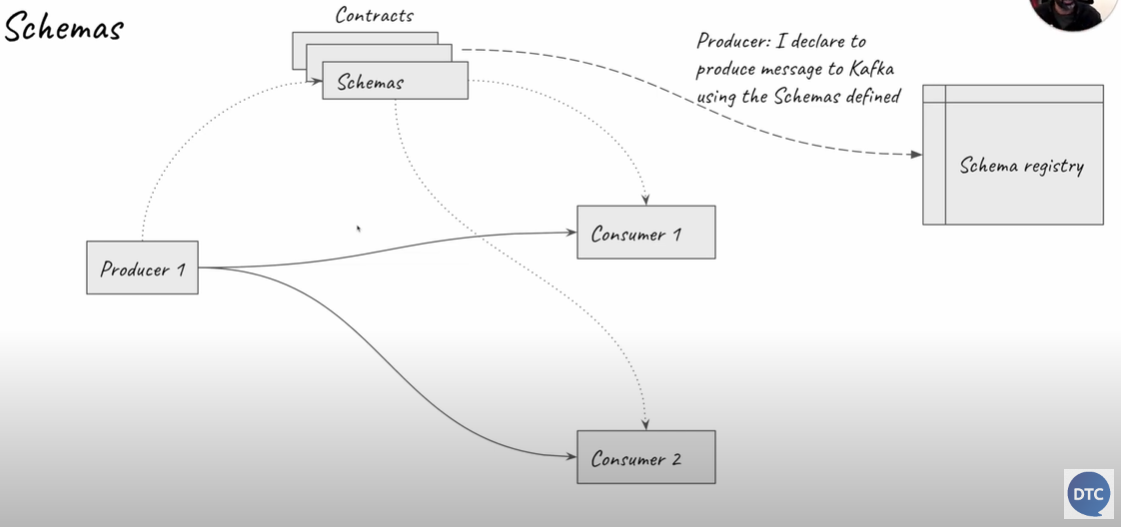

### Schema Registry
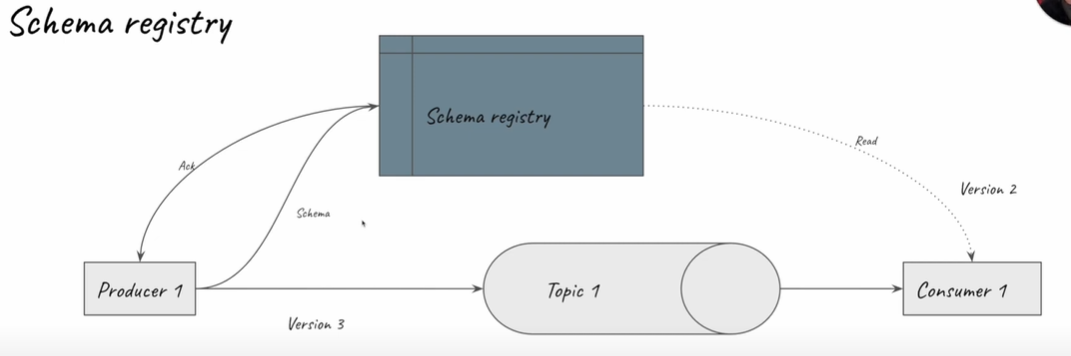

In the above graph, Producer creates a new schema of Version 3. First, the schema is being validated by *Schema Registry* to verify that new schema is compatible. If this is the case, it responds by using `Acknowledge*. Meanwhile, Consumer can can read from Version 2 only if the schemas are compatible.

We can use not only JSON format. For example -> AVRO, Protobuf, ...

### AVRO
Avro is a data serialization framework developed within the Apache Hadoop project. It is widely used in data streaming and big data platforms, such as Apache Kafka, for efficiently encoding data in a compact binary format.

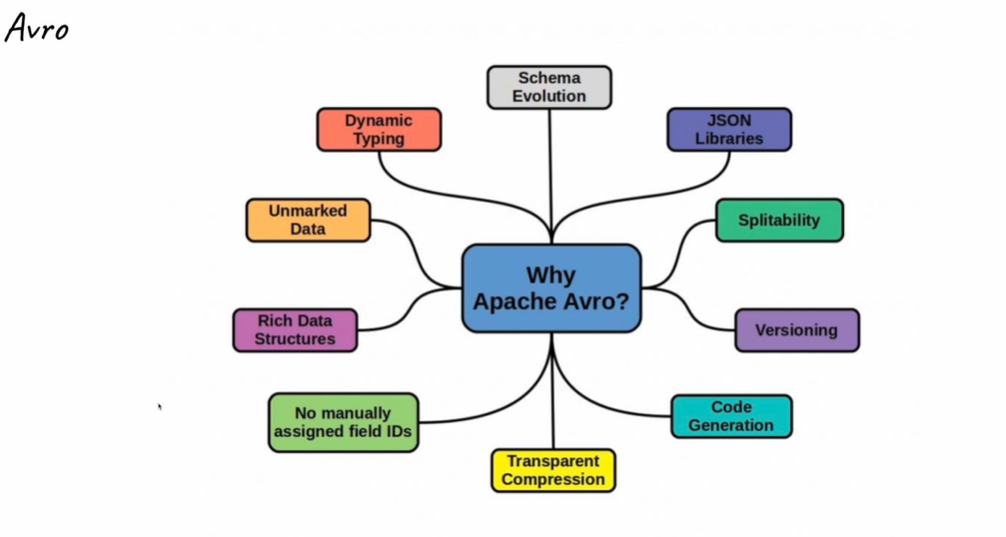

### Compatibility

**Forward Compatibility**
- Producers can write using v2 whereas Consumers can still consume using an old version 1

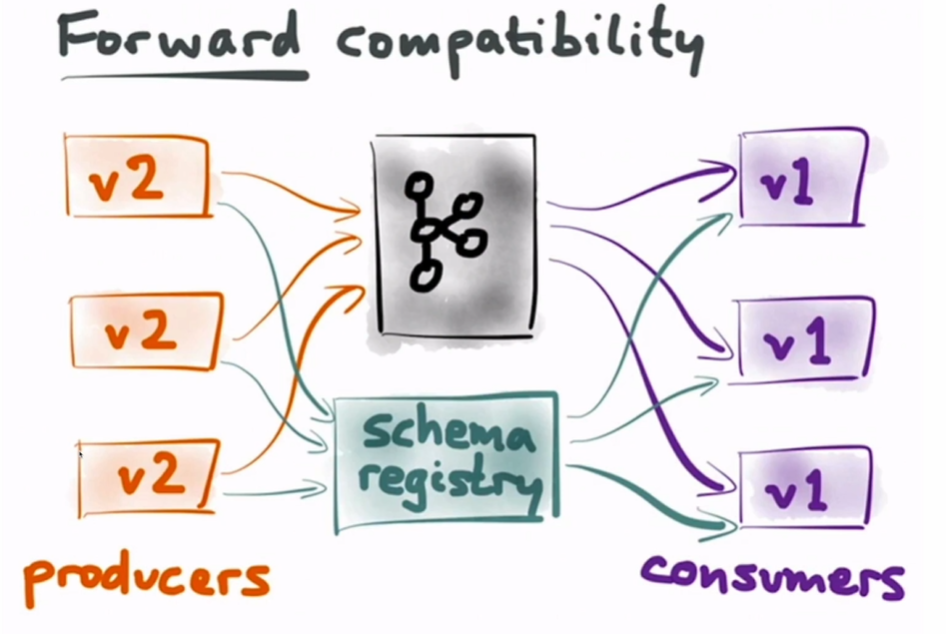

**Backward Compatibility**
- Producers can write using v1 whereas Consumers cannot consume using v1, olny another version, v2

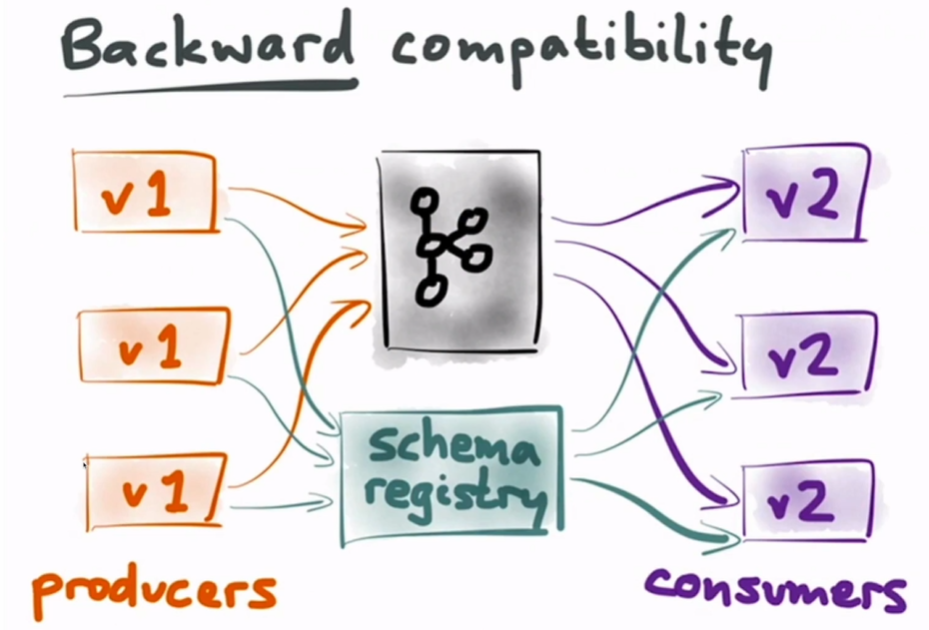

**Mixed/Full Compatibility**
- Producers and Consumer can produce/consume using any schema version

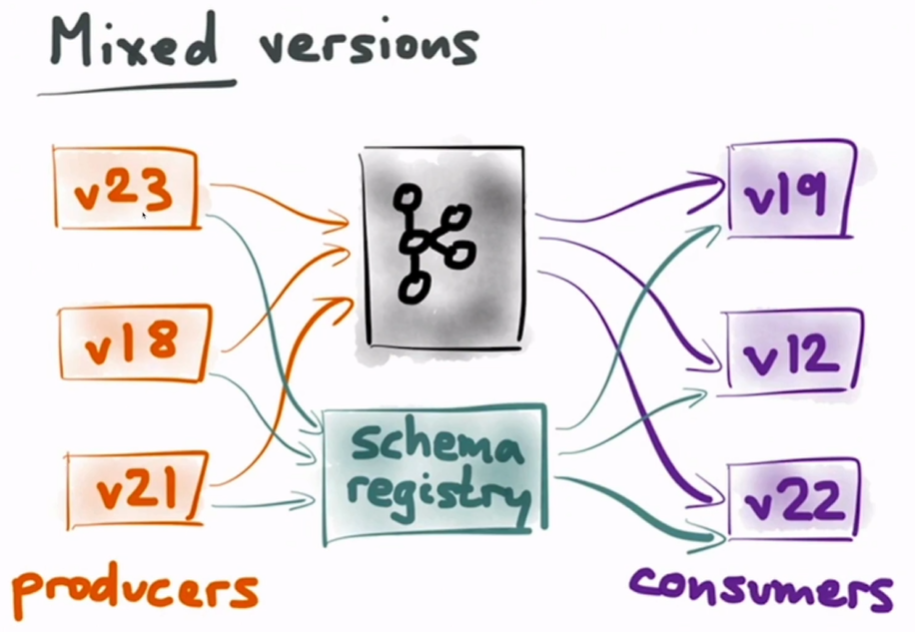

### Python Related Implementation
- [Kafka Streaming with Kafka](https://www.youtube.com/watch?v=BgAlVknDFlQ&list=PL3MmuxUbc_hJed7dXYoJw8DoCuVHhGEQb&index=79)
- [PySpark Streaming](https://www.youtube.com/watch?v=VIVr7KwRQmE&list=PL3MmuxUbc_hJed7dXYoJw8DoCuVHhGEQb&index=80)